In [1]:
#Deep_Learning - Convolutional_Neural_Network -Image_Classification - End_to_End-Implementation -

In [2]:
#Import libraries -
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

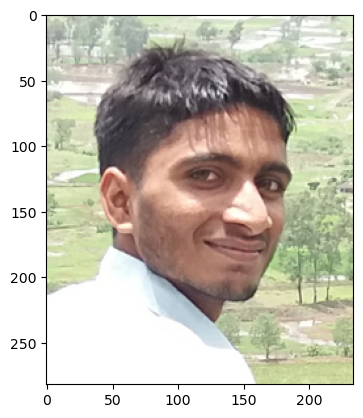

In [3]:
#Lets test the images path -
plt.imshow(image.load_img('F:/VIJAY SHINDE/Courses_undertaken/Data_Science_with_Python\DS_by_TECHNOGEEKS/Daily lectures/September-2022/07-09-2022-Deep_Learning_End_to_End/Convolutional_Neural_Network/3-DL_CNN_Vijay-Avinash-FaceRecognition/train/vijay/1.PNG'))

In [4]:
#Lets see the image size metrics -
cv2.imread('F:/VIJAY SHINDE/Courses_undertaken/Data_Science_with_Python\DS_by_TECHNOGEEKS/Daily lectures/September-2022/07-09-2022-Deep_Learning_End_to_End/Convolutional_Neural_Network/3-DL_CNN_Vijay-Avinash-FaceRecognition/train/vijay/1.PNG')

array([[[204, 225, 216],
        [204, 226, 215],
        [204, 227, 214],
        ...,
        [212, 240, 227],
        [209, 237, 224],
        [209, 237, 224]],

       [[202, 223, 214],
        [207, 229, 218],
        [202, 226, 212],
        ...,
        [206, 234, 221],
        [207, 235, 222],
        [208, 238, 225]],

       [[193, 214, 205],
        [200, 221, 211],
        [202, 225, 214],
        ...,
        [207, 235, 222],
        [207, 236, 223],
        [208, 238, 225]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [164, 217, 208],
        [164, 218, 209],
        [171, 226, 216]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [167, 220, 211],
        [168, 222, 213],
        [173, 229, 218]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [160, 213, 204],
        [165, 219, 210],
        [162, 218, 207]]

In [5]:
#Lets see the image size - pixelsxcolors
cv2.imread('F:/VIJAY SHINDE/Courses_undertaken/Data_Science_with_Python\DS_by_TECHNOGEEKS/Daily lectures/September-2022/07-09-2022-Deep_Learning_End_to_End/Convolutional_Neural_Network/3-DL_CNN_Vijay-Avinash-FaceRecognition/train/vijay/1.PNG').shape

(282, 234, 3)

In [6]:
train = ImageDataGenerator(rescale=1/255)
validate = ImageDataGenerator(rescale=1/255)

In [7]:
X_train = train.flow_from_directory('F:/VIJAY SHINDE/Courses_undertaken/Data_Science_with_Python\DS_by_TECHNOGEEKS/Daily lectures/September-2022/07-09-2022-Deep_Learning_End_to_End/Convolutional_Neural_Network/3-DL_CNN_Vijay-Avinash-FaceRecognition/train/',target_size=(200,200),batch_size=3,class_mode='binary')
y_train = train.flow_from_directory('F:/VIJAY SHINDE/Courses_undertaken/Data_Science_with_Python\DS_by_TECHNOGEEKS/Daily lectures/September-2022/07-09-2022-Deep_Learning_End_to_End/Convolutional_Neural_Network/3-DL_CNN_Vijay-Avinash-FaceRecognition/validate/',target_size=(200,200),batch_size=3,class_mode='binary')

Found 41 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [8]:
X_train.class_indices

{'avinash': 0, 'vijay': 1}

In [9]:
#Create  object for the Algorithm -
classifier=Sequential()

In [10]:
#Lets add first cnn layer -
classifier.add(layers.Conv2D(34,(3,3),activation='relu',input_shape=(200,200,3))) #16 filters(size of filter),i/p-shape of imeage(200,200,3)

In [11]:
#Lets add first Pooling layer - Maximum pulling layer -
classifier.add(layers.MaxPooling2D((2, 2))) #filter size

In [12]:
#Lets add second cnn layer -
classifier.add(layers.Conv2D(30,(3,3),activation='relu'))

In [13]:
#Lets add second Pooling layer - Maximum pulling layer -
classifier.add(layers.MaxPooling2D((2, 2))) 

In [14]:
#Lets add Third cnn layer -
classifier.add(layers.Conv2D(64,(3,3),activation='relu'))

In [15]:
#Lets add Third Pooling layer - Maximum pulling layer -
classifier.add(layers.MaxPooling2D((2, 2)))

In [16]:
#Lets add Flattening layer -
classifier.add(layers.Flatten())

In [17]:
#Lets apply ANN layer of 64 input neurons -
classifier.add(layers.Dense(100,activation='relu'))

In [18]:
#Lets add Output layer -
classifier.add(layers.Dense(1,activation='sigmoid')) #sigmoid is good for binary classification

In [ ]:
'''c#Lets apply the Early stopping - Stop Training when monitored metrics stop imporving),Otherwise mention epochs value only -
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=10,verbose=1,mode='auto',baseline=None,restore_best_weights=False)

#Lets compile the classifier -
classifier.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])
classifier_history = classifier.fit(train_dataset,epochs=10,validation_split=0.33,callbacks=early_stopping,validation_data=validation_dataset)
'''

In [20]:
#Lets compile the classifier -
classifier.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])
classifier_history = classifier.fit(X_train,epochs=10,validation_data=y_train)

C:\Users\om\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
14/14 [==============================] - 6s 173ms/step - loss: 1.4005 - accuracy: 0.4146
Epoch 2/10
14/14 [==============================] - 2s 162ms/step - loss: 0.8265 - accuracy: 0.5366
Epoch 3/10
14/14 [==============================] - 2s 160ms/step - loss: 0.6935 - accuracy: 0.6585
Epoch 4/10
14/14 [==============================] - 2s 161ms/step - loss: 0.8039 - accuracy: 0.7561
Epoch 5/10
14/14 [==============================] - 2s 158ms/step - loss: 0.5079 - accuracy: 0.8293
Epoch 6/10
14/14 [==============================] - 2s 153ms/step - loss: 0.3187 - accuracy: 0.8780
Epoch 7/10
14/14 [==============================] - 2s 172ms/step - loss: 0.1278 - accuracy: 0.9756
Epoch 8/10
14/14 [==============================] - 2s 164ms/step - loss: 0.1410 - accuracy: 0.9512
Epoch 9/10
14/14 [==============================] - 2s 165ms/step - loss: 0.0694 - accuracy: 1.0000
Epoch 10/10
14/14 [==============================] - 2s 163ms/step - loss: 0.2010 - accuracy: 0.8780

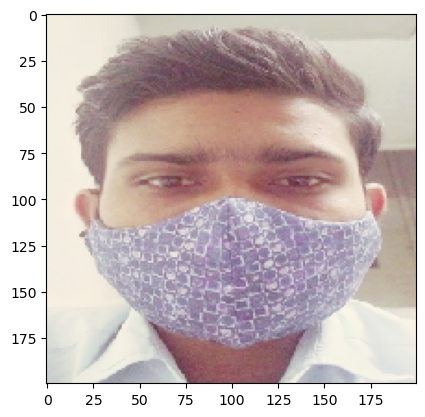

1/1 [==============================] - 0s 29ms/step
Avinash Shinde


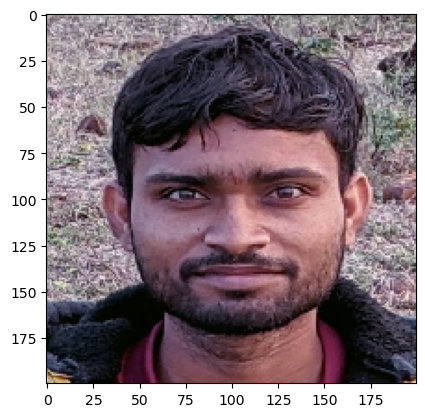

1/1 [==============================] - 0s 29ms/step
Avinash Shinde


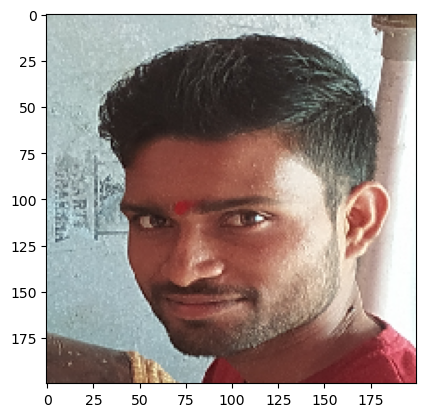

1/1 [==============================] - 0s 29ms/step
Avinash Shinde


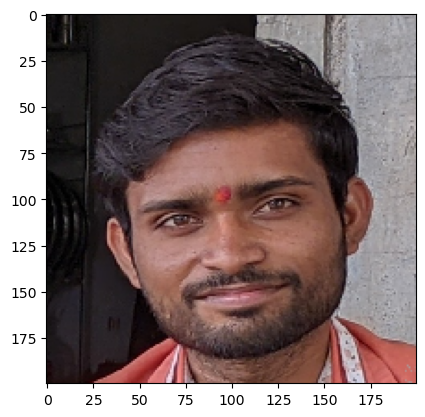

1/1 [==============================] - 0s 33ms/step
Avinash Shinde


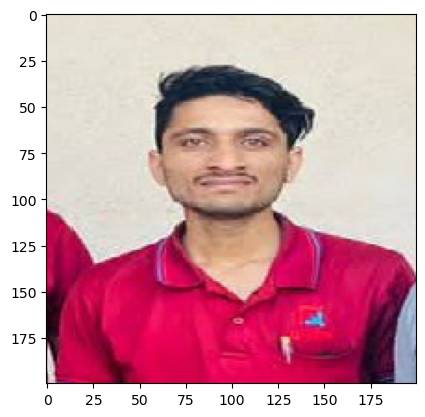

1/1 [==============================] - 0s 28ms/step
Vijay Shinde


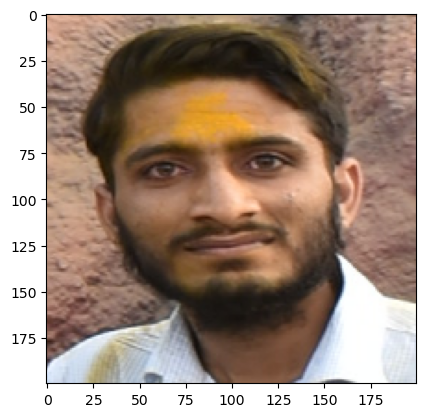

1/1 [==============================] - 0s 28ms/step
Vijay Shinde


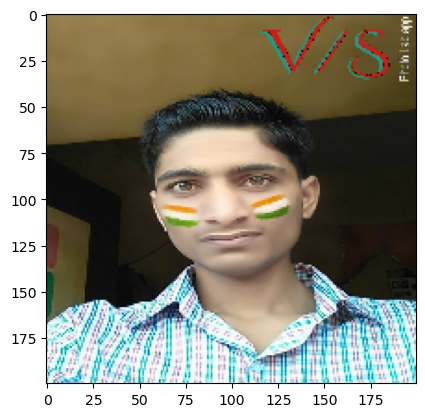

1/1 [==============================] - 0s 29ms/step
Vijay Shinde


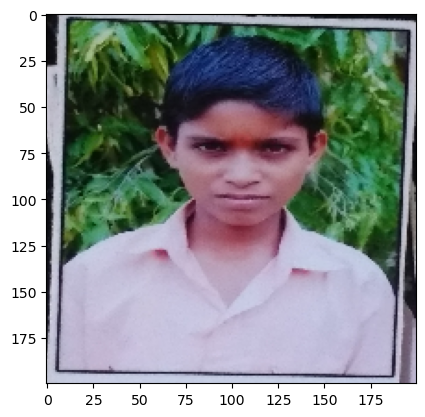

1/1 [==============================] - 0s 31ms/step
Avinash Shinde


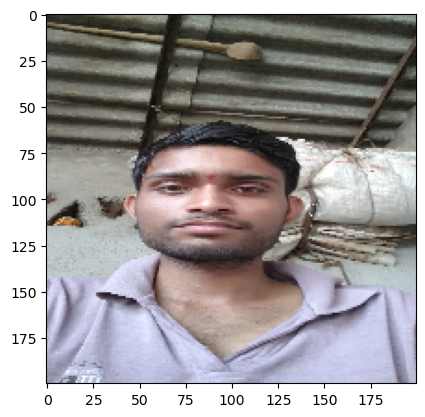

1/1 [==============================] - 0s 28ms/step
Avinash Shinde


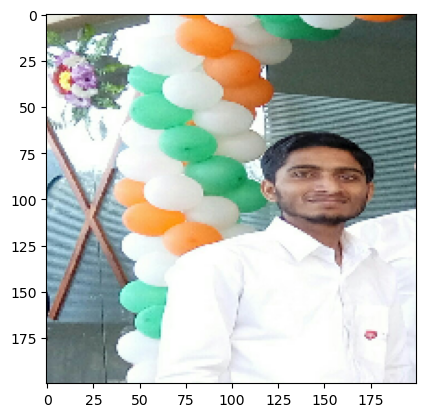

1/1 [==============================] - 0s 30ms/step
Avinash Shinde


In [25]:
#Lets make the Prediction Here-Itself - 
test_datapath = 'F:/VIJAY SHINDE/Courses_undertaken/Data_Science_with_Python\DS_by_TECHNOGEEKS/Daily lectures/September-2022/07-09-2022-Deep_Learning_End_to_End/Convolutional_Neural_Network/3-DL_CNN_Vijay-Avinash-FaceRecognition/test'
for i in os.listdir(test_datapath):
    x1=image.load_img(test_datapath + '//' + i, target_size=(200,200))
    plt.imshow(x1)
    plt.show()
    
    x2=image.img_to_array(x1)
    x3=np.expand_dims(x2,axis=0)
    X_test = np.vstack([x3])
    predict_cnn = classifier.predict(X_test)
    predict_cnn = predict_cnn > 0.5
    if predict_cnn ==0:
        print('Avinash Shinde')
    else:
        print('Vijay Shinde')


In [22]:
#Lets Prediction the Y-axis values - 
predict_cnn = classifier.predict(X_test)
predict_cnn = predict_cnn > 0.5 # accuracy gretter than 0.5 =1 otherwise 0

1/1 [==============================] - 0s 38ms/step
